In [2]:
import glob
import os

import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
from scipy.interpolate import RectBivariateSpline
from tqdm import tqdm

%matplotlib inline

In [14]:
sid_dir = r"D:\OSI-SAF\Preprocessing_Antarctica"
lag_dir = r"D:\SIA_Weddell_Sea"

mesh_files = sorted(glob.glob(f'{lag_dir}/remeshing_Weddell/2015/mesh_*npz'))
print(len(mesh_files), mesh_files[0], mesh_files[-1])

# Load all inital values
mesh_init_file = r"D:\mesh_weddel_ease_25km_mmg_40_52.npz"
xc = np.load(mesh_init_file)['xc']
yc = np.load(mesh_init_file)['yc']
landmask = np.load(mesh_init_file)['landmask']
min_lm = 0.5
force = False

364 D:\SIA_Weddell_Sea/remeshing_Weddell/2015\mesh_20150102.npz D:\SIA_Weddell_Sea/remeshing_Weddell/2015\mesh_20151231.npz


In [15]:
def interpolate(mesh_file):
    basename = os.path.basename(mesh_file)
    sic_dst_file = mesh_file.replace("mesh_", "sic_").replace("/mesh/", "/sic/")
    if os.path.exists(sic_dst_file) and not force:
        return
    print(sic_dst_file)
    mesh_date = basename.split('.')[0].split('_')[-1]
    mesh_year = mesh_date[:4]
    # load mesh
    with np.load(mesh_file) as data:
        x = data['x']
        y = data['y']
        t = data['t']

    # load SIC
    file_mask = f'{sid_dir}/{mesh_year}/ice_drift_sh_ease*{mesh_date}1200.nc.npz'
    try:
        sic_src_file = glob.glob(file_mask)[0]
    except:
        raise ValueError(f'Cannot find {file_mask}')
    try:
        with np.load(sic_src_file) as data:
            cgrd = data['c']
    except:
        print(f'Cannot load c from {sic_src_file}')
        raise ValueError
    cgrd[np.isnan(cgrd)] = 0

    # interpolate SIC
    try:
        c = RectBivariateSpline(xc, yc, cgrd[::-1], kx=1, ky=1)(y[t].mean(axis=1), x[t].mean(axis=1), grid=False)
    except:
        raise ValueError(f'Fail to interpolate SIC in {mesh_file}')
    # interpolate landmask
    try:
        lm = RectBivariateSpline(xc, yc, landmask[::-1], kx=1, ky=1)(y[t].mean(axis=1), x[t].mean(axis=1), grid=False)
    except:
        raise ValueError(f'Fail to interpolate LM in {mesh_file}')
    # clear land elements
    c[lm > min_lm] = 0
    os.makedirs(os.path.split(sic_dst_file)[0], exist_ok=True)
    np.savez(sic_dst_file, c=c)

for mesh_file in tqdm(mesh_files, desc="Interpolating SIC"):
    interpolate(mesh_file)

Interpolating SIC:   0%|▏                                                              | 1/364 [00:00<01:03,  5.75it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150102.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150103.npz


Interpolating SIC:   1%|▌                                                              | 3/364 [00:00<01:03,  5.70it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150104.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150105.npz


Interpolating SIC:   1%|▊                                                              | 5/364 [00:00<00:56,  6.34it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150106.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150107.npz


Interpolating SIC:   2%|█▏                                                             | 7/364 [00:01<00:52,  6.85it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150108.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150109.npz


Interpolating SIC:   2%|█▌                                                             | 9/364 [00:01<00:50,  7.03it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150110.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150111.npz


Interpolating SIC:   3%|█▊                                                            | 11/364 [00:01<00:51,  6.89it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150112.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150113.npz


Interpolating SIC:   4%|██▏                                                           | 13/364 [00:01<00:49,  7.10it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150114.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150115.npz


Interpolating SIC:   4%|██▌                                                           | 15/364 [00:02<00:47,  7.37it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150116.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150117.npz


Interpolating SIC:   5%|██▉                                                           | 17/364 [00:02<00:45,  7.67it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150118.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150119.npz


Interpolating SIC:   5%|███▏                                                          | 19/364 [00:02<00:45,  7.61it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150120.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150121.npz


Interpolating SIC:   6%|███▌                                                          | 21/364 [00:02<00:43,  7.92it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150122.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150123.npz


Interpolating SIC:   6%|███▉                                                          | 23/364 [00:03<00:44,  7.59it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150124.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150125.npz


Interpolating SIC:   7%|████▎                                                         | 25/364 [00:03<00:46,  7.34it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150126.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150127.npz


Interpolating SIC:   7%|████▌                                                         | 27/364 [00:03<00:46,  7.19it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150128.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150129.npz


Interpolating SIC:   8%|████▉                                                         | 29/364 [00:04<00:46,  7.15it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150130.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150131.npz


Interpolating SIC:   9%|█████▎                                                        | 31/364 [00:04<00:46,  7.22it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150201.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150202.npz


Interpolating SIC:   9%|█████▌                                                        | 33/364 [00:04<00:46,  7.06it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150203.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150204.npz


Interpolating SIC:  10%|█████▉                                                        | 35/364 [00:04<00:45,  7.23it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150205.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150206.npz


Interpolating SIC:  10%|██████▎                                                       | 37/364 [00:05<00:51,  6.38it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150207.npz


Interpolating SIC:  10%|██████▍                                                       | 38/364 [00:05<00:53,  6.14it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150208.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150209.npz


Interpolating SIC:  11%|██████▊                                                       | 40/364 [00:05<00:50,  6.46it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150210.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150211.npz


Interpolating SIC:  12%|███████▏                                                      | 42/364 [00:06<00:46,  6.98it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150212.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150213.npz


Interpolating SIC:  12%|███████▍                                                      | 44/364 [00:06<00:43,  7.32it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150214.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150215.npz


Interpolating SIC:  13%|███████▊                                                      | 46/364 [00:06<00:44,  7.13it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150216.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150217.npz


Interpolating SIC:  13%|████████▏                                                     | 48/364 [00:06<00:43,  7.26it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150218.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150219.npz


Interpolating SIC:  14%|████████▌                                                     | 50/364 [00:07<00:44,  7.01it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150220.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150221.npz


Interpolating SIC:  14%|████████▊                                                     | 52/364 [00:07<00:45,  6.91it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150222.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150223.npz


Interpolating SIC:  15%|█████████▏                                                    | 54/364 [00:07<00:47,  6.55it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150224.npz


Interpolating SIC:  15%|█████████▎                                                    | 55/364 [00:07<00:48,  6.41it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150225.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150226.npz


Interpolating SIC:  15%|█████████▌                                                    | 56/364 [00:08<00:47,  6.42it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150227.npz


Interpolating SIC:  16%|█████████▉                                                    | 58/364 [00:08<00:53,  5.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150228.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150301.npz


Interpolating SIC:  16%|██████████▏                                                   | 60/364 [00:08<00:47,  6.46it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150302.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150303.npz


Interpolating SIC:  17%|██████████▌                                                   | 62/364 [00:08<00:42,  7.09it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150304.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150305.npz


Interpolating SIC:  18%|██████████▉                                                   | 64/364 [00:09<00:40,  7.41it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150306.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150307.npz


Interpolating SIC:  18%|███████████▏                                                  | 66/364 [00:09<00:41,  7.16it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150308.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150309.npz


Interpolating SIC:  19%|███████████▌                                                  | 68/364 [00:09<00:41,  7.11it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150310.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150311.npz


Interpolating SIC:  19%|███████████▉                                                  | 70/364 [00:10<00:40,  7.24it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150312.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150313.npz


Interpolating SIC:  20%|████████████▎                                                 | 72/364 [00:10<00:39,  7.47it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150314.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150315.npz


Interpolating SIC:  20%|████████████▌                                                 | 74/364 [00:10<00:38,  7.48it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150316.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150317.npz


Interpolating SIC:  21%|████████████▉                                                 | 76/364 [00:10<00:38,  7.39it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150318.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150319.npz


Interpolating SIC:  21%|█████████████▎                                                | 78/364 [00:11<00:38,  7.34it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150320.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150321.npz


Interpolating SIC:  22%|█████████████▋                                                | 80/364 [00:11<00:43,  6.50it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150322.npz


Interpolating SIC:  22%|█████████████▊                                                | 81/364 [00:11<00:44,  6.41it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150323.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150324.npz


Interpolating SIC:  23%|██████████████▏                                               | 83/364 [00:11<00:39,  7.15it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150325.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150326.npz


Interpolating SIC:  23%|██████████████▍                                               | 85/364 [00:12<00:38,  7.28it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150327.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150328.npz


Interpolating SIC:  24%|██████████████▊                                               | 87/364 [00:12<00:37,  7.45it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150329.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150330.npz


Interpolating SIC:  24%|███████████████▏                                              | 89/364 [00:12<00:37,  7.35it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150331.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150401.npz


Interpolating SIC:  25%|███████████████▌                                              | 91/364 [00:12<00:36,  7.58it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150402.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150403.npz


Interpolating SIC:  26%|███████████████▊                                              | 93/364 [00:13<00:34,  7.97it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150404.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150405.npz


Interpolating SIC:  26%|████████████████▏                                             | 95/364 [00:13<00:33,  8.15it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150406.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150407.npz


Interpolating SIC:  27%|████████████████▌                                             | 97/364 [00:13<00:37,  7.14it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150408.npz


Interpolating SIC:  27%|████████████████▋                                             | 98/364 [00:13<00:38,  6.97it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150409.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150410.npz


Interpolating SIC:  27%|████████████████▊                                            | 100/364 [00:14<00:42,  6.25it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150411.npz


Interpolating SIC:  28%|████████████████▉                                            | 101/364 [00:14<00:39,  6.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150412.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150413.npz


Interpolating SIC:  28%|█████████████████▎                                           | 103/364 [00:14<00:35,  7.27it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150414.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150415.npz


Interpolating SIC:  29%|█████████████████▌                                           | 105/364 [00:14<00:34,  7.48it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150416.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150417.npz


Interpolating SIC:  29%|█████████████████▉                                           | 107/364 [00:15<00:33,  7.68it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150418.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150419.npz


Interpolating SIC:  30%|██████████████████▎                                          | 109/364 [00:15<00:31,  7.97it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150420.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150421.npz


Interpolating SIC:  30%|██████████████████▌                                          | 111/364 [00:15<00:31,  8.11it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150422.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150423.npz


Interpolating SIC:  31%|██████████████████▉                                          | 113/364 [00:15<00:36,  6.88it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150424.npz


Interpolating SIC:  31%|███████████████████                                          | 114/364 [00:16<00:38,  6.48it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150425.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150426.npz


Interpolating SIC:  32%|███████████████████▍                                         | 116/364 [00:16<00:34,  7.16it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150427.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150428.npz


Interpolating SIC:  32%|███████████████████▊                                         | 118/364 [00:16<00:32,  7.65it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150429.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150430.npz


Interpolating SIC:  33%|████████████████████                                         | 120/364 [00:16<00:31,  7.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150501.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150502.npz


Interpolating SIC:  34%|████████████████████▍                                        | 122/364 [00:17<00:33,  7.13it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150503.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150504.npz


Interpolating SIC:  34%|████████████████████▊                                        | 124/364 [00:17<00:33,  7.14it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150505.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150506.npz


Interpolating SIC:  35%|█████████████████████                                        | 126/364 [00:17<00:35,  6.64it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150507.npz


Interpolating SIC:  35%|█████████████████████▎                                       | 127/364 [00:17<00:35,  6.74it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150508.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150509.npz


Interpolating SIC:  35%|█████████████████████▌                                       | 129/364 [00:18<00:32,  7.22it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150510.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150511.npz


Interpolating SIC:  36%|█████████████████████▉                                       | 131/364 [00:18<00:32,  7.20it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150512.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150513.npz


Interpolating SIC:  37%|██████████████████████▎                                      | 133/364 [00:18<00:30,  7.65it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150514.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150515.npz


Interpolating SIC:  37%|██████████████████████▌                                      | 135/364 [00:18<00:28,  7.97it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150516.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150517.npz


Interpolating SIC:  38%|██████████████████████▉                                      | 137/364 [00:19<00:28,  7.84it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150518.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150519.npz


Interpolating SIC:  38%|███████████████████████▎                                     | 139/364 [00:19<00:29,  7.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150520.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150521.npz


Interpolating SIC:  39%|███████████████████████▋                                     | 141/364 [00:19<00:28,  7.69it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150522.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150523.npz


Interpolating SIC:  39%|███████████████████████▉                                     | 143/364 [00:19<00:28,  7.82it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150524.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150525.npz


Interpolating SIC:  40%|████████████████████████▎                                    | 145/364 [00:20<00:28,  7.56it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150526.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150527.npz


Interpolating SIC:  40%|████████████████████████▋                                    | 147/364 [00:20<00:28,  7.69it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150528.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150529.npz


Interpolating SIC:  41%|████████████████████████▉                                    | 149/364 [00:20<00:32,  6.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150530.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150531.npz


Interpolating SIC:  41%|█████████████████████████▎                                   | 151/364 [00:21<00:30,  7.00it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150601.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150602.npz


Interpolating SIC:  42%|█████████████████████████▍                                   | 152/364 [00:21<00:30,  7.05it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150603.npz


Interpolating SIC:  42%|█████████████████████████▋                                   | 153/364 [00:21<00:38,  5.50it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150604.npz


Interpolating SIC:  42%|█████████████████████████▊                                   | 154/364 [00:21<00:48,  4.37it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150605.npz


Interpolating SIC:  43%|█████████████████████████▉                                   | 155/364 [00:22<00:58,  3.58it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150606.npz


Interpolating SIC:  43%|██████████████████████████▏                                  | 156/364 [00:22<00:57,  3.65it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150607.npz


Interpolating SIC:  43%|██████████████████████████▍                                  | 158/364 [00:22<00:47,  4.37it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150608.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150609.npz


Interpolating SIC:  44%|██████████████████████████▊                                  | 160/364 [00:23<00:36,  5.61it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150610.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150611.npz


Interpolating SIC:  45%|███████████████████████████▏                                 | 162/364 [00:23<00:30,  6.52it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150612.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150613.npz


Interpolating SIC:  45%|███████████████████████████▍                                 | 164/364 [00:23<00:28,  7.08it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150614.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150615.npz


Interpolating SIC:  46%|███████████████████████████▊                                 | 166/364 [00:23<00:26,  7.52it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150616.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150617.npz


Interpolating SIC:  46%|████████████████████████████▏                                | 168/364 [00:24<00:25,  7.72it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150618.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150619.npz


Interpolating SIC:  47%|████████████████████████████▍                                | 170/364 [00:24<00:24,  7.88it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150620.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150621.npz


Interpolating SIC:  47%|████████████████████████████▊                                | 172/364 [00:24<00:24,  7.76it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150622.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150623.npz


Interpolating SIC:  48%|█████████████████████████████▏                               | 174/364 [00:24<00:24,  7.84it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150624.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150625.npz


Interpolating SIC:  48%|█████████████████████████████▍                               | 176/364 [00:25<00:24,  7.52it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150626.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150627.npz


Interpolating SIC:  49%|█████████████████████████████▊                               | 178/364 [00:25<00:24,  7.64it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150628.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150629.npz


Interpolating SIC:  49%|██████████████████████████████▏                              | 180/364 [00:25<00:23,  7.78it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150630.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150701.npz


Interpolating SIC:  50%|██████████████████████████████▌                              | 182/364 [00:26<00:23,  7.77it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150702.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150703.npz


Interpolating SIC:  51%|██████████████████████████████▊                              | 184/364 [00:26<00:23,  7.61it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150704.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150705.npz


Interpolating SIC:  51%|███████████████████████████████▏                             | 186/364 [00:26<00:23,  7.53it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150706.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150707.npz


Interpolating SIC:  52%|███████████████████████████████▌                             | 188/364 [00:26<00:22,  7.69it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150708.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150709.npz


Interpolating SIC:  52%|███████████████████████████████▊                             | 190/364 [00:27<00:22,  7.67it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150710.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150711.npz


Interpolating SIC:  53%|████████████████████████████████▏                            | 192/364 [00:27<00:22,  7.64it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150712.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150713.npz


Interpolating SIC:  53%|████████████████████████████████▌                            | 194/364 [00:27<00:22,  7.69it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150714.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150715.npz


Interpolating SIC:  54%|████████████████████████████████▊                            | 196/364 [00:27<00:22,  7.41it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150716.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150717.npz


Interpolating SIC:  54%|█████████████████████████████████▏                           | 198/364 [00:28<00:22,  7.43it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150718.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150719.npz


Interpolating SIC:  55%|█████████████████████████████████▌                           | 200/364 [00:28<00:21,  7.56it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150720.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150721.npz


Interpolating SIC:  55%|█████████████████████████████████▊                           | 202/364 [00:28<00:21,  7.70it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150722.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150723.npz


Interpolating SIC:  56%|██████████████████████████████████▏                          | 204/364 [00:28<00:20,  7.73it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150724.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150725.npz


Interpolating SIC:  57%|██████████████████████████████████▌                          | 206/364 [00:29<00:20,  7.74it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150726.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150727.npz


Interpolating SIC:  57%|██████████████████████████████████▊                          | 208/364 [00:29<00:20,  7.54it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150728.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150729.npz


Interpolating SIC:  58%|███████████████████████████████████▏                         | 210/364 [00:29<00:21,  7.14it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150730.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150731.npz


Interpolating SIC:  58%|███████████████████████████████████▌                         | 212/364 [00:30<00:21,  7.15it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150801.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150802.npz


Interpolating SIC:  59%|███████████████████████████████████▊                         | 214/364 [00:30<00:20,  7.30it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150803.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150804.npz


Interpolating SIC:  59%|████████████████████████████████████▏                        | 216/364 [00:30<00:21,  6.84it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150805.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150806.npz


Interpolating SIC:  60%|████████████████████████████████████▌                        | 218/364 [00:30<00:22,  6.54it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150807.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150808.npz


Interpolating SIC:  60%|████████████████████████████████████▊                        | 220/364 [00:31<00:21,  6.56it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150809.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150810.npz


Interpolating SIC:  61%|█████████████████████████████████████▏                       | 222/364 [00:31<00:21,  6.59it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150811.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150812.npz


Interpolating SIC:  62%|█████████████████████████████████████▌                       | 224/364 [00:31<00:21,  6.61it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150813.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150814.npz


Interpolating SIC:  62%|█████████████████████████████████████▊                       | 226/364 [00:32<00:20,  6.82it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150815.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150816.npz


Interpolating SIC:  63%|██████████████████████████████████████▏                      | 228/364 [00:32<00:19,  7.10it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150817.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150818.npz


Interpolating SIC:  63%|██████████████████████████████████████▌                      | 230/364 [00:32<00:18,  7.27it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150819.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150820.npz


Interpolating SIC:  64%|██████████████████████████████████████▉                      | 232/364 [00:32<00:18,  7.31it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150821.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150822.npz


Interpolating SIC:  64%|███████████████████████████████████████▏                     | 234/364 [00:33<00:17,  7.35it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150823.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150824.npz


Interpolating SIC:  65%|███████████████████████████████████████▌                     | 236/364 [00:33<00:17,  7.35it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150825.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150826.npz


Interpolating SIC:  65%|███████████████████████████████████████▉                     | 238/364 [00:33<00:17,  7.40it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150827.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150828.npz


Interpolating SIC:  66%|████████████████████████████████████████▏                    | 240/364 [00:34<00:16,  7.36it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150829.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150830.npz


Interpolating SIC:  66%|████████████████████████████████████████▌                    | 242/364 [00:34<00:17,  7.04it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150831.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150901.npz


Interpolating SIC:  67%|████████████████████████████████████████▉                    | 244/364 [00:34<00:17,  6.93it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150902.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150903.npz


Interpolating SIC:  68%|█████████████████████████████████████████▏                   | 246/364 [00:34<00:16,  7.10it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150904.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150905.npz


Interpolating SIC:  68%|█████████████████████████████████████████▌                   | 248/364 [00:35<00:16,  7.01it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150906.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150907.npz


Interpolating SIC:  69%|█████████████████████████████████████████▉                   | 250/364 [00:35<00:16,  6.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150908.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150909.npz


Interpolating SIC:  69%|██████████████████████████████████████████▏                  | 252/364 [00:35<00:18,  6.14it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150910.npz


Interpolating SIC:  70%|██████████████████████████████████████████▍                  | 253/364 [00:35<00:18,  6.02it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150911.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150912.npz


Interpolating SIC:  70%|██████████████████████████████████████████▋                  | 255/364 [00:36<00:17,  6.19it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150913.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150914.npz


Interpolating SIC:  71%|███████████████████████████████████████████                  | 257/364 [00:36<00:17,  5.98it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150915.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150916.npz


Interpolating SIC:  71%|███████████████████████████████████████████▍                 | 259/364 [00:36<00:16,  6.29it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150917.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150918.npz


Interpolating SIC:  72%|███████████████████████████████████████████▋                 | 261/364 [00:37<00:15,  6.81it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150919.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150920.npz


Interpolating SIC:  72%|████████████████████████████████████████████                 | 263/364 [00:37<00:15,  6.42it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150921.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150922.npz


Interpolating SIC:  73%|████████████████████████████████████████████▍                | 265/364 [00:37<00:14,  6.72it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150923.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150924.npz


Interpolating SIC:  73%|████████████████████████████████████████████▋                | 267/364 [00:38<00:14,  6.72it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150925.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150926.npz


Interpolating SIC:  74%|█████████████████████████████████████████████                | 269/364 [00:38<00:14,  6.70it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150927.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150928.npz


Interpolating SIC:  74%|█████████████████████████████████████████████▍               | 271/364 [00:38<00:13,  6.82it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150929.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20150930.npz


Interpolating SIC:  75%|█████████████████████████████████████████████▊               | 273/364 [00:39<00:13,  6.58it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151001.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151002.npz


Interpolating SIC:  76%|██████████████████████████████████████████████               | 275/364 [00:39<00:12,  7.03it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151003.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151004.npz


Interpolating SIC:  76%|██████████████████████████████████████████████▎              | 276/364 [00:39<00:12,  7.21it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151005.npz


Interpolating SIC:  76%|██████████████████████████████████████████████▌              | 278/364 [00:39<00:13,  6.53it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151006.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151007.npz


Interpolating SIC:  77%|██████████████████████████████████████████████▉              | 280/364 [00:40<00:12,  6.89it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151008.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151009.npz


Interpolating SIC:  77%|███████████████████████████████████████████████▎             | 282/364 [00:40<00:11,  7.30it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151010.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151011.npz


Interpolating SIC:  78%|███████████████████████████████████████████████▌             | 284/364 [00:40<00:11,  7.06it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151012.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151013.npz


Interpolating SIC:  79%|███████████████████████████████████████████████▉             | 286/364 [00:40<00:10,  7.23it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151014.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151015.npz


Interpolating SIC:  79%|████████████████████████████████████████████████▎            | 288/364 [00:41<00:10,  7.06it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151016.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151017.npz


Interpolating SIC:  80%|████████████████████████████████████████████████▌            | 290/364 [00:41<00:11,  6.59it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151018.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151019.npz


Interpolating SIC:  80%|████████████████████████████████████████████████▉            | 292/364 [00:41<00:10,  7.02it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151020.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151021.npz


Interpolating SIC:  81%|█████████████████████████████████████████████████▎           | 294/364 [00:41<00:09,  7.46it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151022.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151023.npz


Interpolating SIC:  81%|█████████████████████████████████████████████████▌           | 296/364 [00:42<00:09,  7.01it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151024.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151025.npz


Interpolating SIC:  82%|█████████████████████████████████████████████████▉           | 298/364 [00:42<00:09,  6.71it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151026.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151027.npz


Interpolating SIC:  82%|██████████████████████████████████████████████████▎          | 300/364 [00:42<00:09,  6.77it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151028.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151029.npz


Interpolating SIC:  83%|██████████████████████████████████████████████████▌          | 302/364 [00:43<00:09,  6.79it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151030.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151031.npz


Interpolating SIC:  84%|██████████████████████████████████████████████████▉          | 304/364 [00:43<00:09,  6.42it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151101.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151102.npz


Interpolating SIC:  84%|███████████████████████████████████████████████████▎         | 306/364 [00:43<00:08,  6.81it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151103.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151104.npz


Interpolating SIC:  85%|███████████████████████████████████████████████████▌         | 308/364 [00:44<00:08,  6.92it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151105.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151106.npz


Interpolating SIC:  85%|███████████████████████████████████████████████████▉         | 310/364 [00:44<00:07,  7.39it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151107.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151108.npz


Interpolating SIC:  86%|████████████████████████████████████████████████████▎        | 312/364 [00:44<00:07,  7.38it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151109.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151110.npz


Interpolating SIC:  86%|████████████████████████████████████████████████████▌        | 314/364 [00:44<00:06,  7.67it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151111.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151112.npz


Interpolating SIC:  87%|████████████████████████████████████████████████████▉        | 316/364 [00:45<00:06,  7.43it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151113.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151114.npz


Interpolating SIC:  87%|█████████████████████████████████████████████████████▎       | 318/364 [00:45<00:06,  7.60it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151115.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151116.npz


Interpolating SIC:  88%|█████████████████████████████████████████████████████▋       | 320/364 [00:45<00:06,  7.29it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151117.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151118.npz


Interpolating SIC:  88%|█████████████████████████████████████████████████████▉       | 322/364 [00:45<00:05,  7.28it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151119.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151120.npz


Interpolating SIC:  89%|██████████████████████████████████████████████████████▎      | 324/364 [00:46<00:05,  7.52it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151121.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151122.npz


Interpolating SIC:  90%|██████████████████████████████████████████████████████▋      | 326/364 [00:46<00:05,  7.27it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151123.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151124.npz


Interpolating SIC:  90%|██████████████████████████████████████████████████████▉      | 328/364 [00:46<00:04,  7.47it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151125.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151126.npz


Interpolating SIC:  91%|███████████████████████████████████████████████████████▎     | 330/364 [00:47<00:04,  7.24it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151127.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151128.npz


Interpolating SIC:  91%|███████████████████████████████████████████████████████▋     | 332/364 [00:47<00:04,  7.34it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151129.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151130.npz


Interpolating SIC:  92%|███████████████████████████████████████████████████████▉     | 334/364 [00:47<00:04,  6.87it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151201.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151202.npz


Interpolating SIC:  92%|████████████████████████████████████████████████████████▎    | 336/364 [00:47<00:03,  7.11it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151203.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151204.npz


Interpolating SIC:  93%|████████████████████████████████████████████████████████▋    | 338/364 [00:48<00:03,  7.24it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151205.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151206.npz


Interpolating SIC:  93%|████████████████████████████████████████████████████████▉    | 340/364 [00:48<00:03,  6.98it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151207.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151208.npz


Interpolating SIC:  94%|█████████████████████████████████████████████████████████▎   | 342/364 [00:48<00:03,  7.03it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151209.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151210.npz


Interpolating SIC:  95%|█████████████████████████████████████████████████████████▋   | 344/364 [00:49<00:02,  7.11it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151211.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151212.npz


Interpolating SIC:  95%|█████████████████████████████████████████████████████████▉   | 346/364 [00:49<00:02,  7.08it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151213.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151214.npz


Interpolating SIC:  96%|██████████████████████████████████████████████████████████▎  | 348/364 [00:49<00:02,  7.24it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151215.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151216.npz


Interpolating SIC:  96%|██████████████████████████████████████████████████████████▋  | 350/364 [00:49<00:01,  7.07it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151217.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151218.npz


Interpolating SIC:  97%|██████████████████████████████████████████████████████████▉  | 352/364 [00:50<00:01,  7.15it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151219.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151220.npz


Interpolating SIC:  97%|███████████████████████████████████████████████████████████▎ | 354/364 [00:50<00:01,  7.03it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151221.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151222.npz


Interpolating SIC:  98%|███████████████████████████████████████████████████████████▋ | 356/364 [00:50<00:01,  7.32it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151223.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151224.npz


Interpolating SIC:  98%|███████████████████████████████████████████████████████████▉ | 358/364 [00:50<00:00,  7.38it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151225.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151226.npz


Interpolating SIC:  99%|████████████████████████████████████████████████████████████▎| 360/364 [00:51<00:00,  7.21it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151227.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151228.npz


Interpolating SIC:  99%|████████████████████████████████████████████████████████████▋| 362/364 [00:51<00:00,  6.99it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151229.npz
D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151230.npz


Interpolating SIC: 100%|█████████████████████████████████████████████████████████████| 364/364 [00:51<00:00,  7.02it/s]

D:\SIA_Weddell_Sea/remeshing_Weddell/2015\sic_20151231.npz


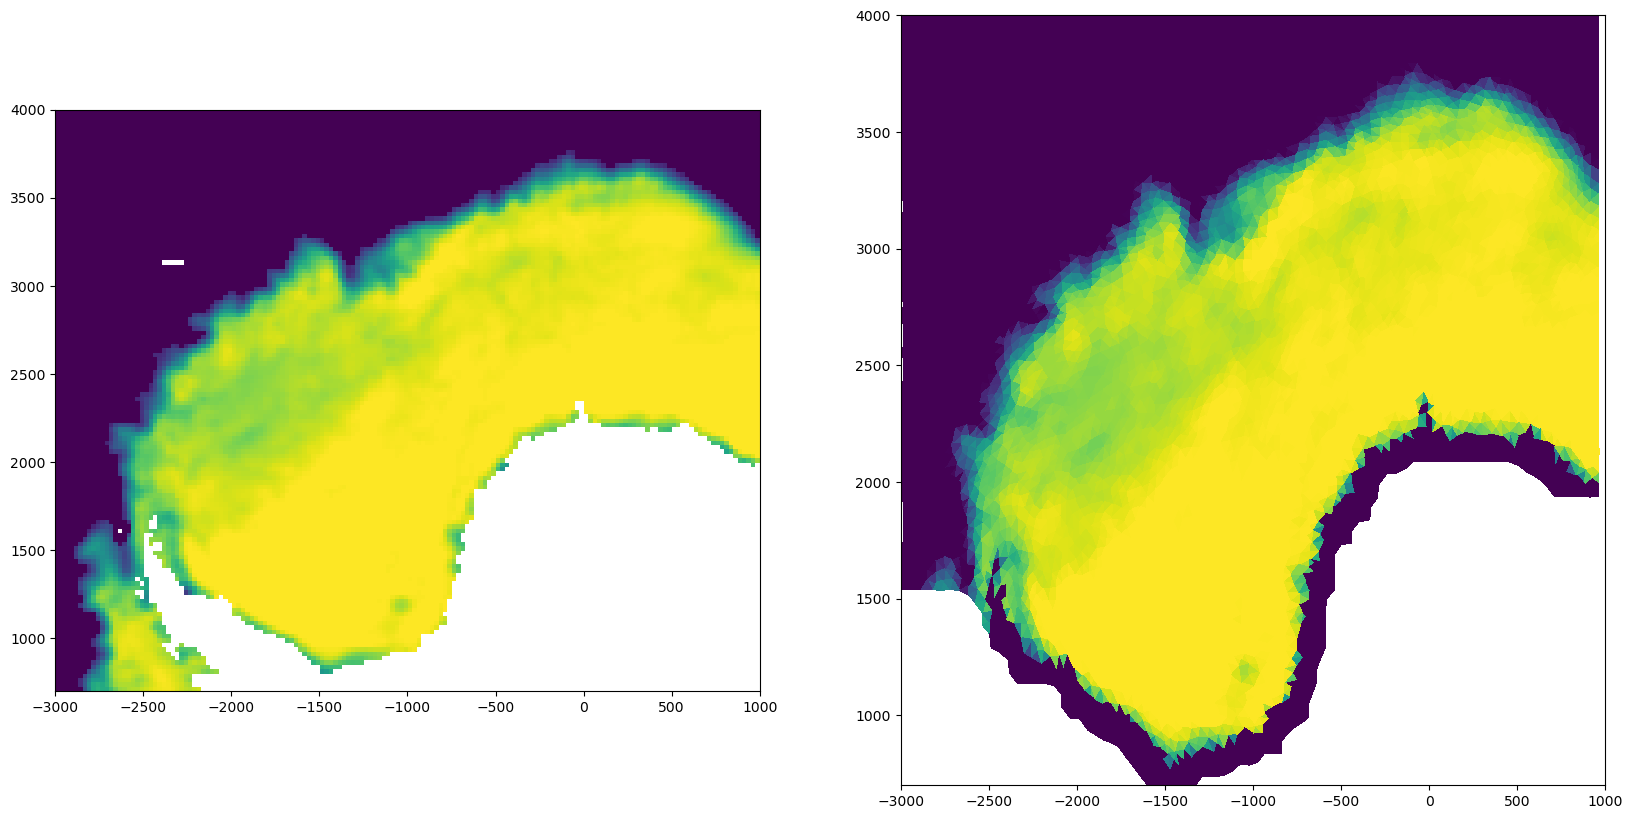

In [21]:
year = '2015'
date = '0711'
cgrd = np.load(glob.glob(f'{sid_dir}/{year}/ice_drift_sh_ease*{year}{date}1200.nc.npz')[0])['c']
c = np.load(f'{lag_dir}/remeshing_Weddell/{year}/sic_{year}{date}.npz')['c']
x = np.load(f'{lag_dir}/remeshing_Weddell/{year}/mesh_{year}{date}.npz')['x']
y = np.load(f'{lag_dir}/remeshing_Weddell/{year}/mesh_{year}{date}.npz')['y']
t = np.load(f'{lag_dir}/remeshing_Weddell/{year}/mesh_{year}{date}.npz')['t']

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(cgrd, extent=[xc.min(), xc.max(), yc.min(), yc.max()])
ax[1].tripcolor(x, y, c, triangles=t)

for a in ax:
    a.set_xlim([-3000, 1000])
    a.set_ylim([700, 4000])
plt.show()

